In [1]:
import numpy as np
import sys
import os
import pandas as pd
import glob as glob
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
def grouped_pointplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(12.5,7.5))
    g = sns.pointplot(x=x, y=y, hue=hue, data=df, size=8, estimator=np.mean, ci=95, n_boot=1000,
                       palette="cubehelix", ax=ax)

    sns.despine(ax=ax, left=True)
    ax.set_title(title,fontsize=24)
    ax.set_ylabel(y,fontsize=24)
    ax.set_xlabel('order',fontsize=24)
    ax.set_ylim(ymin, ymax)
    ax.hlines(y=1/300, xmin=0, xmax=10, linewidth=2, color='r')
    l = ax.legend(loc='center right', bbox_to_anchor=(1.55, .65), ncol=2,fontsize=24)
    l.set_title(hue,prop={'size':24})
    ax.tick_params(labelsize=20)
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')

In [3]:
def grouped_barplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(12.5,7.5))
    g = sns.factorplot(x=x, y=y, hue=hue, data=df, size=8, kind="bar", estimator=np.mean, ci=95, n_boot=1000,
                       palette="cubehelix", ax=ax, order=['intact', 'paragraph', 'word', 'rest'])

    sns.despine(ax=ax, left=True)
    ax.set_title(title, fontsize=24)
    ax.set_ylabel(y, fontsize=20)
    ax.set_xlabel(x, fontsize=20)
    ax.set_ylim(ymin, ymax)
    ax.hlines(y=1/300, xmin=-.5, xmax=3.5, linewidth=2, color='r')
    l = ax.legend(loc='center right', bbox_to_anchor=(1, .65), ncol=2, fontsize=16)
    l.set_title(hue,prop={'size':20})
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')

In [4]:
def chance_barplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(12.5,7.5))
    g = sns.factorplot(x=x, y=y, hue=hue, data=df, size=8, kind="bar", estimator=np.mean, ci=95, n_boot=1000,
                       palette="cubehelix", ax=ax, order=['rest'])

    sns.despine(ax=ax, left=True)
    ax.set_title(title)
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    ax.set_ylim(ymin, ymax)
    ax.hlines(y=1/300, xmin=-.5, xmax=.5, linewidth=2, color='r')
    l = ax.legend(loc='center right', bbox_to_anchor=(1, .65), ncol=2)
    l.set_title(hue,prop={'size':20})
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')                                          

In [5]:
def level_grouped_barplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(12.5,7.5))
    g = sns.factorplot(x=x, y=y, hue=hue, data=df, size=8, kind="bar", estimator=np.mean, ci=95, n_boot=1000,
                       palette="cubehelix", ax=ax, hue_order=['intact', 'paragraph', 'word', 'rest'])

    sns.despine(ax=ax, left=True)
    ax.set_title(title, fontsize=24)
    ax.set_ylabel(y, fontsize=20)
    ax.set_xlabel(x, fontsize=20)
    ax.set_ylim(ymin, ymax)
    ax.hlines(y=1/300, xmin=-.5, xmax=10.5, linewidth=2, color='r')
    l = ax.legend(loc='center right', bbox_to_anchor=(1, .65), ncol=2, fontsize=16)
    l.set_title(hue,prop={'size':20})
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')

In [6]:
all_data_dir = os.path.join(os.getenv('HOME'), 'Desktop', 'timecorr_env', 'timecorr_paper', 'pieman', 'results')

In [ ]:
figdir = '../../figs'
if not os.path.isdir(figdir):
    os.mkdir('figs')
figdir = 'figs'

In [7]:
# figdir = '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/figs'
# if not os.path.isdir(figdir):
#     os.mkdir(figdir)

## Compare accuracy by level when initializing optimize function with either even, random, or all last

In [8]:
analysis_name = 'level_analysis_rand_compare'

In [9]:
data_dir = os.path.join(all_data_dir, analysis_name)

In [10]:
params =glob.glob(os.path.join(data_dir, '*'))

In [11]:
params

['/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/level_analysis_rand_compare/isfc_eigenvector_centrality_mexican_hat_5',
 '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/level_analysis_rand_compare/isfc_eigenvector_centrality_mexican_hat_5_last',
 '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/level_analysis_rand_compare/isfc_eigenvector_centrality_mexican_hat_5_rand',
 '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/level_analysis_rand_compare/isfc_PCA_mexican_hat_5',
 '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/level_analysis_rand_compare/isfc_PCA_mexican_hat_5_last',
 '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/level_analysis_rand_compare/isfc_PCA_mexican_hat_5_rand']

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


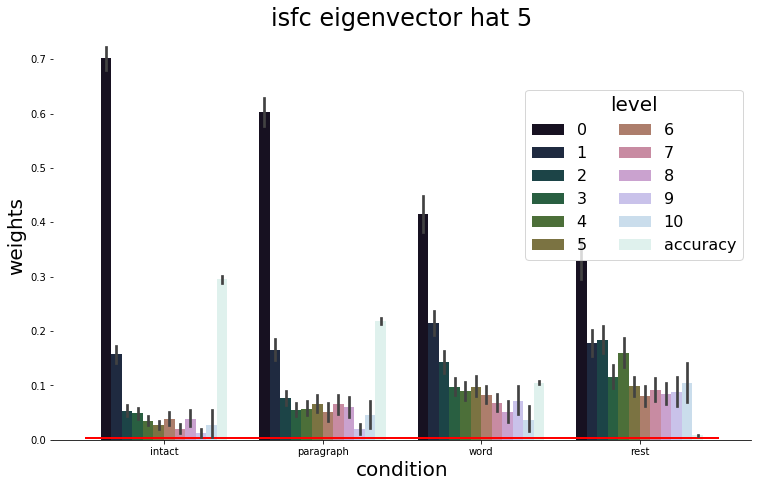

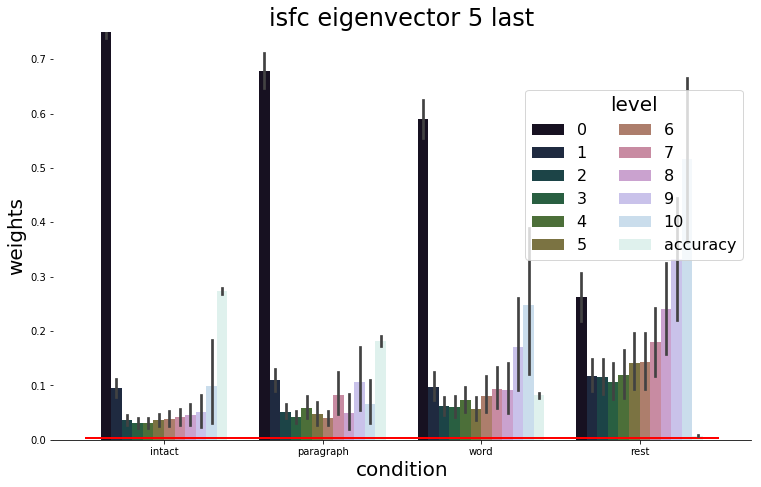

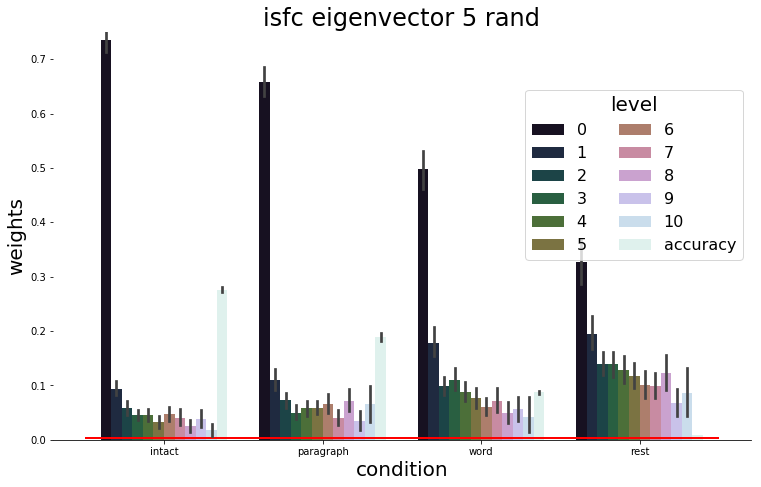

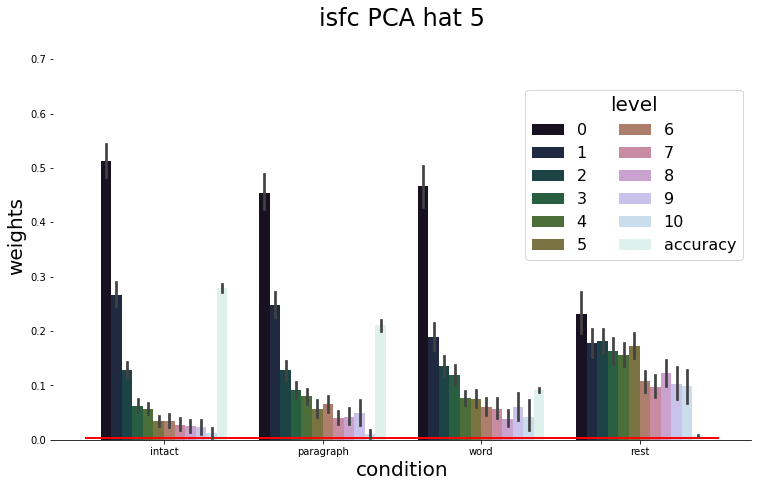

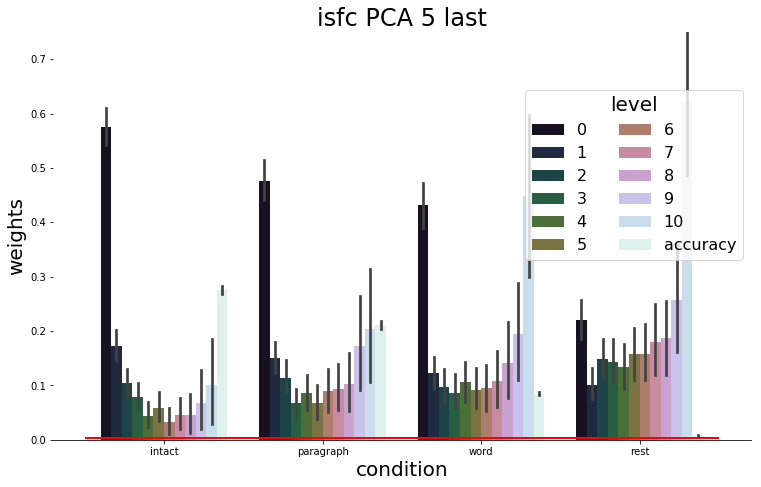

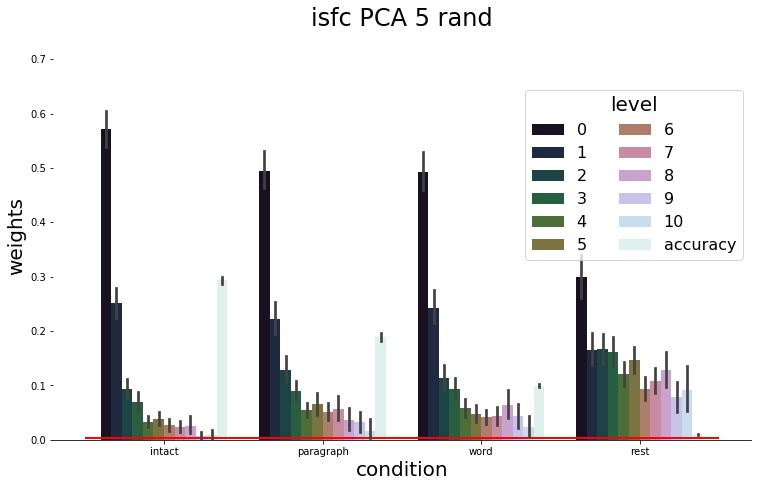

In [12]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

        melted_df = pd.DataFrame()
        for c in np.arange(full_data['level'].max() + 2):
            if c!=full_data['level'].max() + 1:
                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['level_' + str(c)]
                melted_temp_df['level'] = full_data['level']
                melted_temp_df['level'] = c
                melted_temp_df['condition'] = full_data['condition']

                if melted_df.empty:
                    melted_df = melted_temp_df
                else:
                    melted_df = melted_df.append(melted_temp_df)
            else:

                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['accuracy']
                melted_temp_df['level'] = full_data['level']
                melted_temp_df['level'] = 'accuracy'
                melted_temp_df['condition'] = full_data['condition']
                melted_df = melted_df.append(melted_temp_df)
                full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_weights_'+ analysis_name + '.pdf')
    grouped_barplot(melted_df, 'condition', 'weights', 'level', ymin=0, ymax=.75, title=title, outfile=outfile)
    plt.close()

In [13]:
params =glob.glob(os.path.join(data_dir, '*'))

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


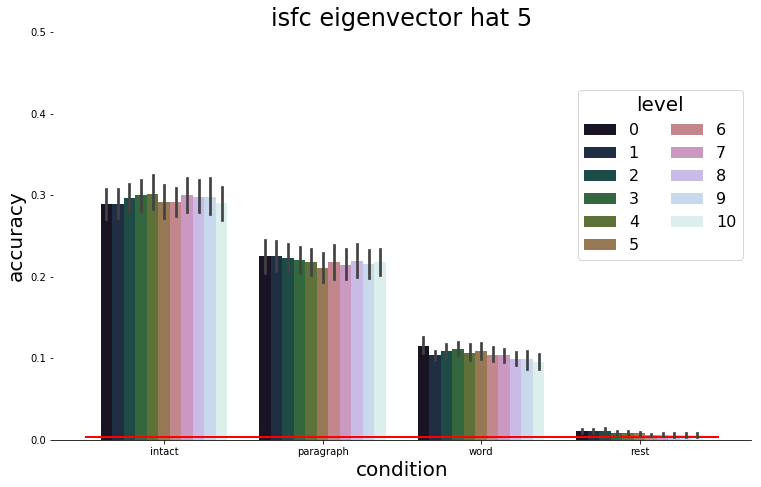

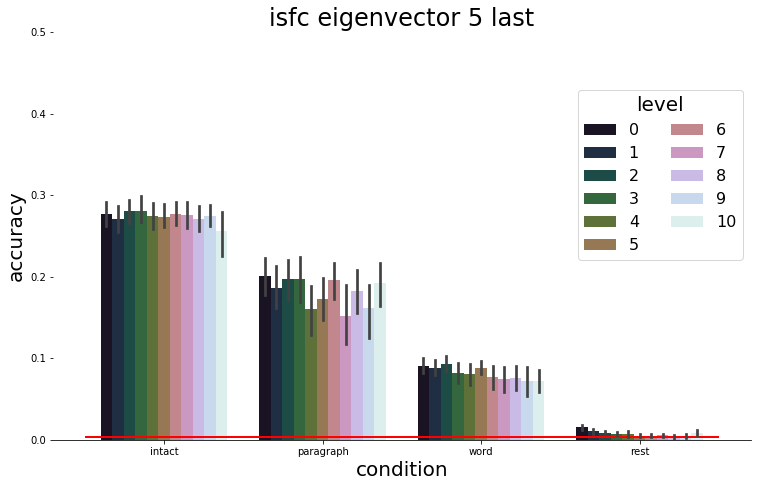

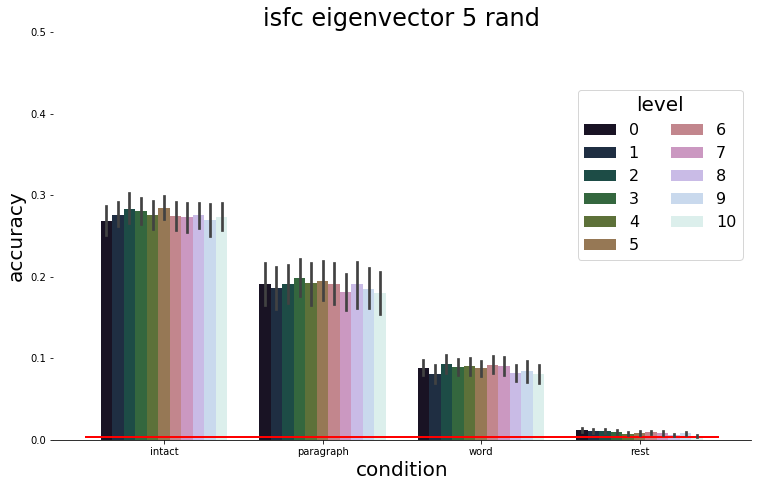

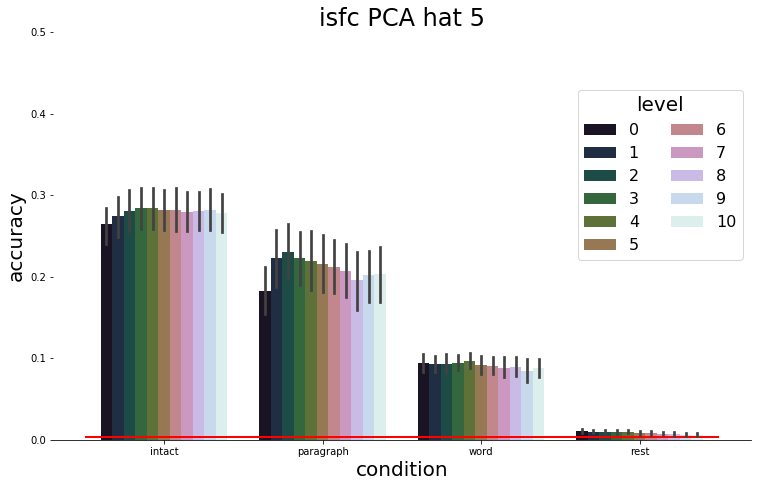

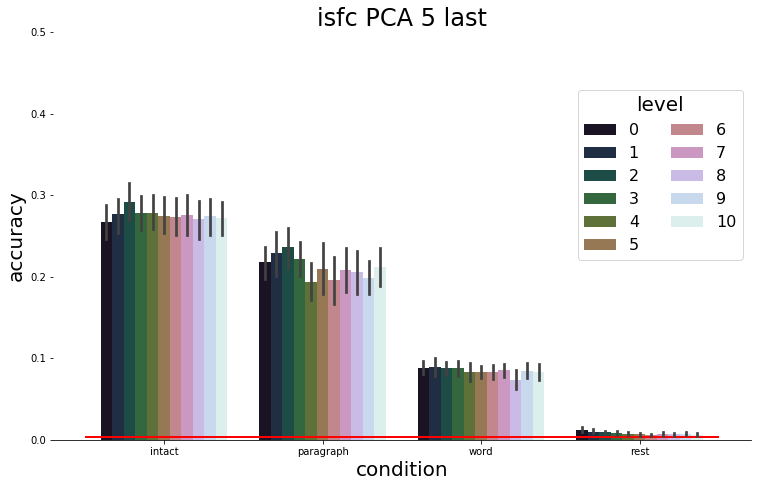

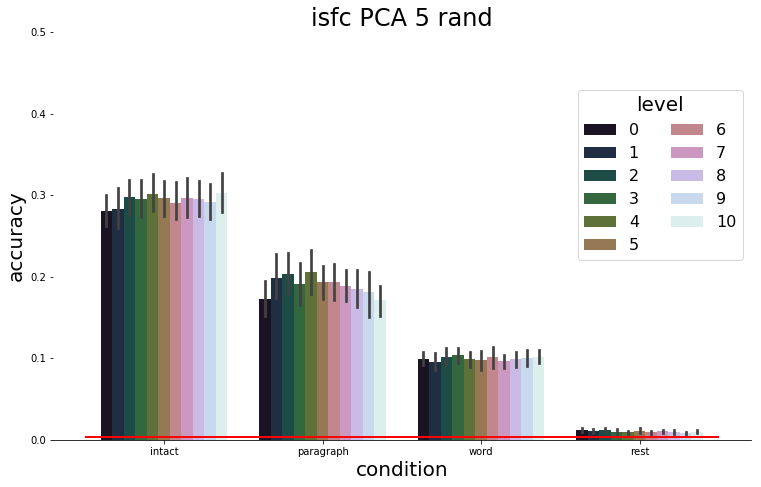

In [14]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

    p_split = param_name.split('_')
    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1]

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.pdf')
    grouped_barplot(full_data, 'condition', 'accuracy', 'level', ymin=0, ymax=.5, title=title, outfile=outfile)
    plt.close()

## Find accuracy by each level 

In [15]:
analysis_name = 'level_analysis_ind'

In [16]:
data_dir = os.path.join(all_data_dir, analysis_name)

In [17]:
params =glob.glob(os.path.join(data_dir, '*'))

In [18]:
params

['/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/level_analysis_ind/isfc_eigenvector_centrality_mexican_hat_5',
 '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/level_analysis_ind/isfc_PCA_mexican_hat_5']

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


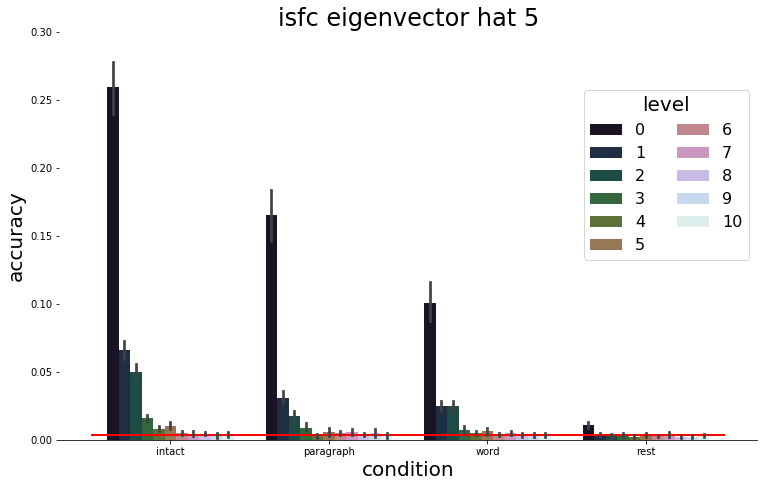

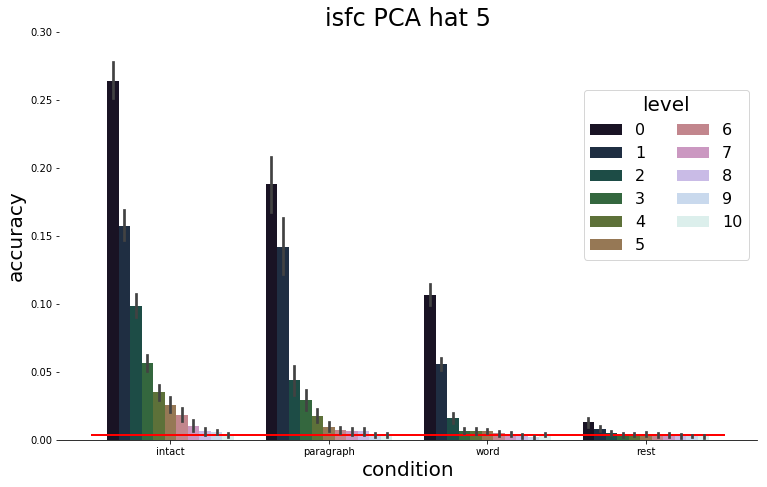

In [19]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

    full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')
    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1]

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.pdf')
    grouped_barplot(full_data[full_data['level']<=10], 'condition', 'accuracy', 'level', ymin=0, ymax=.3, title=title, outfile=outfile)
    plt.close()

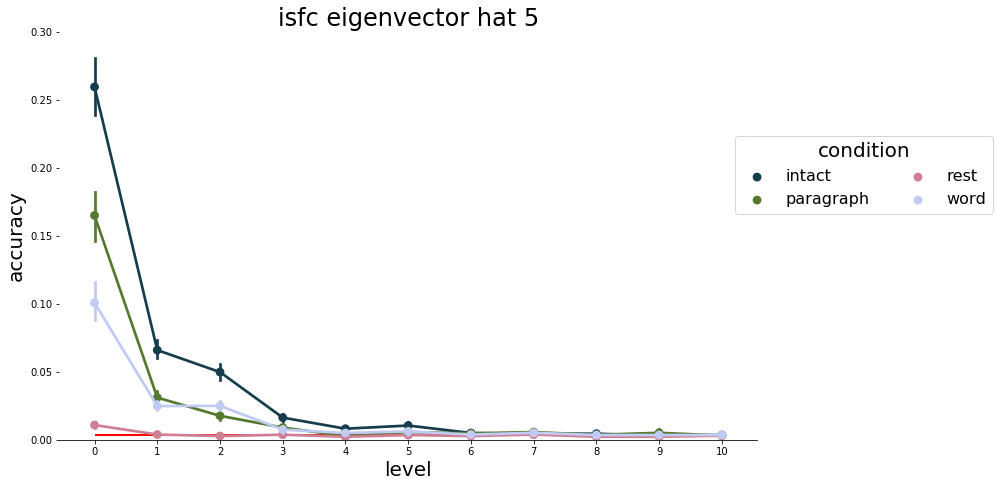

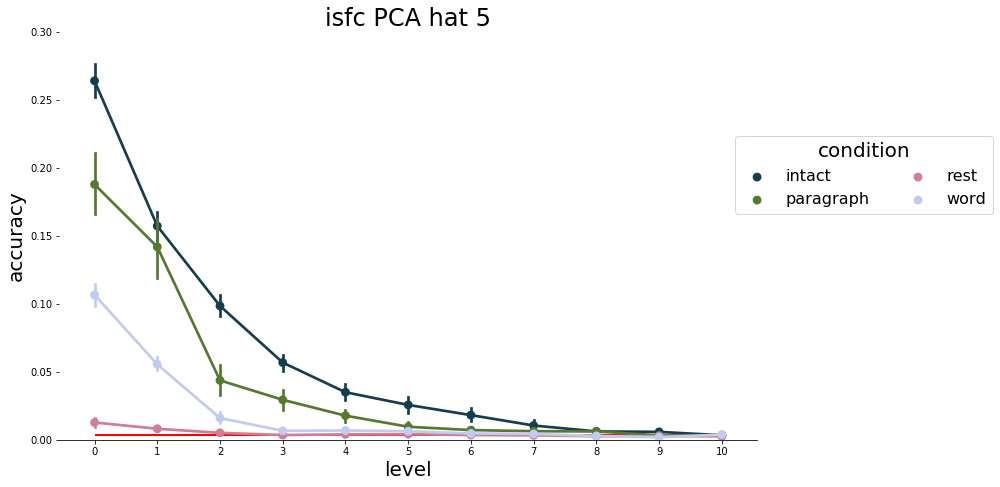

In [20]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)



    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_line_'+ analysis_name + '.pdf')
    grouped_pointplot(full_data[full_data['level']<=10], 'level', 'accuracy','condition', ymin=0, ymax=.3, title=title, outfile=outfile)
    plt.show()
    plt.close()

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


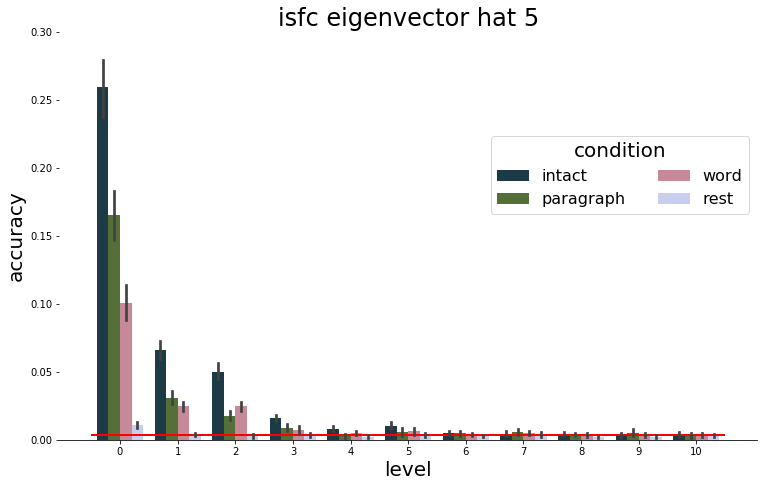

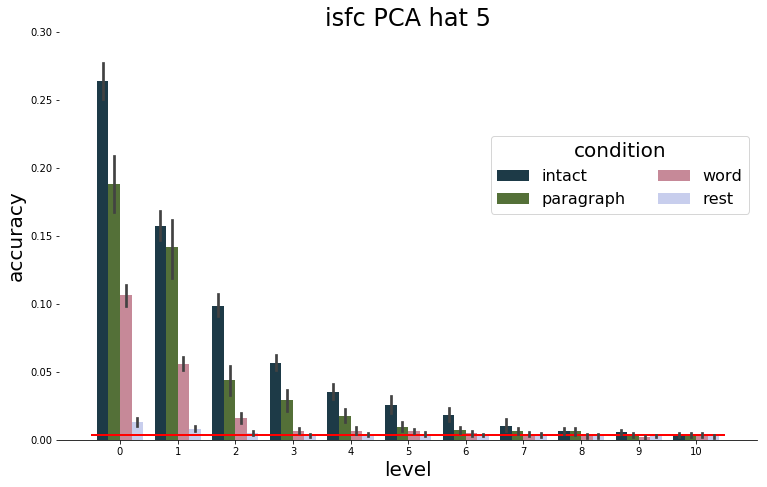

In [21]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

    full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')
    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1]

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.pdf')
    level_grouped_barplot(full_data[full_data['level']<=10],'level', 'accuracy', 'condition', ymin=0, ymax=.3, title=title, outfile=outfile)
    plt.close()

## Plot proportion of peak accuracy 

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


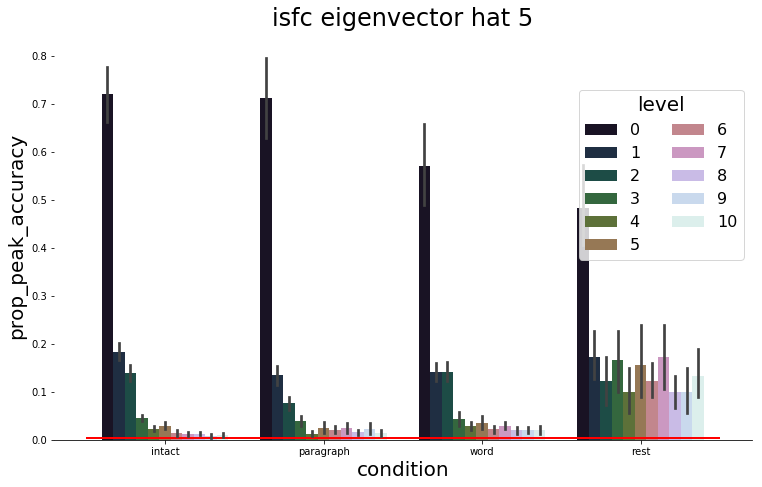

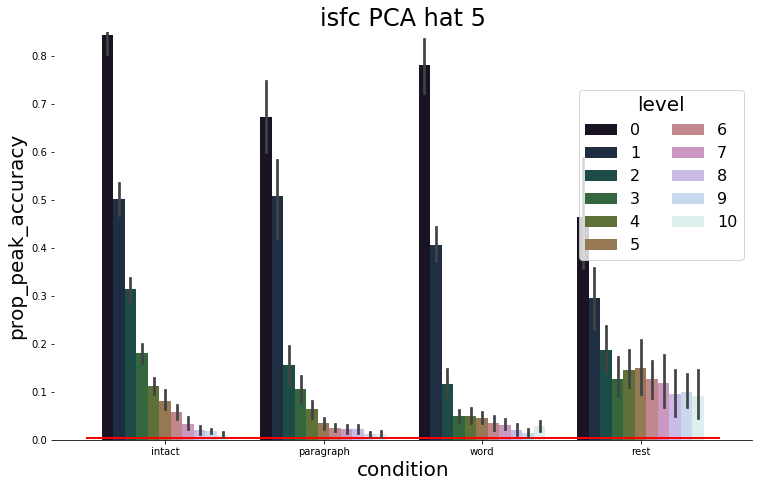

In [22]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])
        data['prop_peak_accuracy'] = data['accuracy']/data['accuracy'].max()
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)
            
    full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')
    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1]

    outfile = os.path.join(figdir, param_name + '_peakprop_'+ analysis_name + '.pdf')
    grouped_barplot(full_data[full_data['level']<=10], 'condition', 'prop_peak_accuracy', 'level', ymin=0, ymax=.85, title=title, outfile=outfile)
    plt.close()

## Find optimimal level

In [8]:
analysis_name = 'level_analysis_optimized'

In [9]:
data_dir = os.path.join(all_data_dir, analysis_name)

In [10]:
params =glob.glob(os.path.join(data_dir, '*'))

In [11]:
params

['/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/level_analysis_optimized/isfc_eigenvector_centrality_mexican_hat_5',
 '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/level_analysis_optimized/isfc_PCA_mexican_hat_5']

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


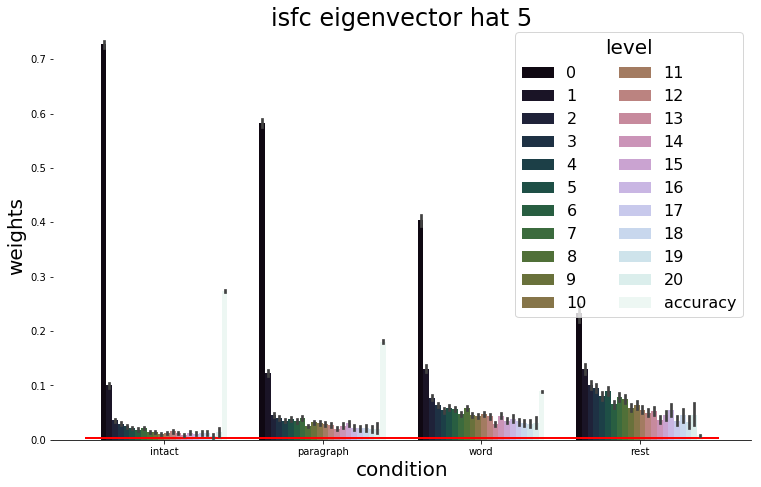

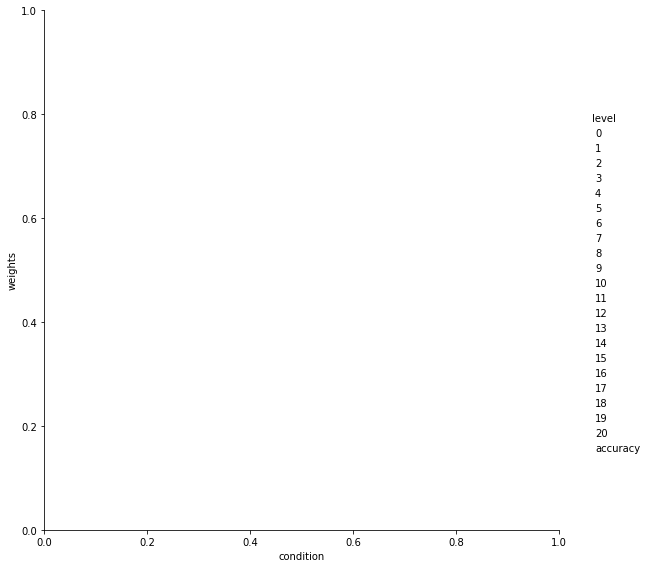

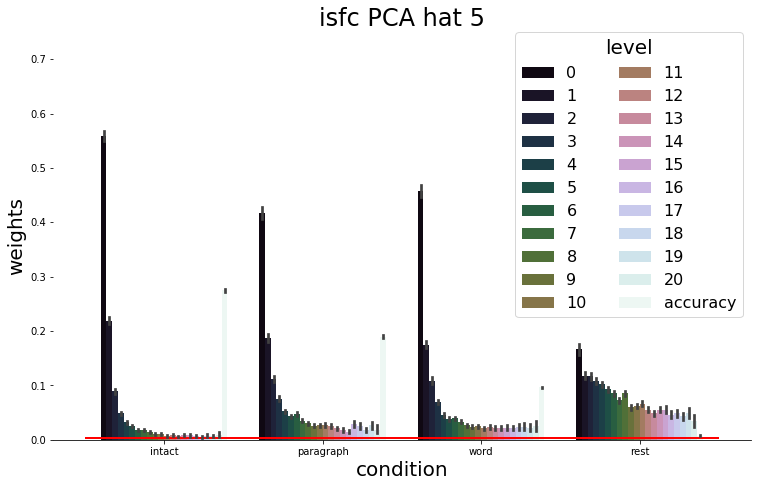

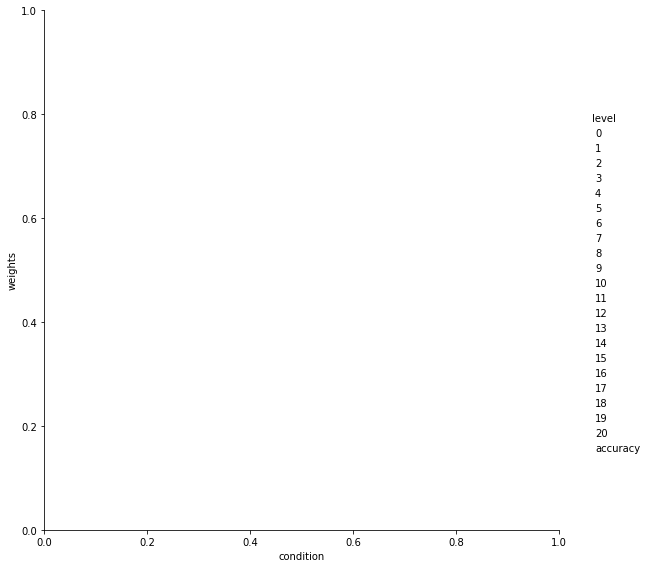

In [12]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

        melted_df = pd.DataFrame()
        for c in np.arange(full_data['level'].max() + 2):
            if c!=full_data['level'].max() + 1:
                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['level_' + str(c)]
                melted_temp_df['level'] = full_data['level']
                melted_temp_df['level'] = c
                melted_temp_df['condition'] = full_data['condition']

                if melted_df.empty:
                    melted_df = melted_temp_df
                else:
                    melted_df = melted_df.append(melted_temp_df)
            else:

                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['accuracy']
                melted_temp_df['level'] = full_data['level']
                melted_temp_df['level'] = 'accuracy'
                melted_temp_df['condition'] = full_data['condition']
                melted_df = melted_df.append(melted_temp_df)
                full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.pdf')
    grouped_barplot(melted_df, 'condition', 'weights', 'level', ymin=0, ymax=.75, title=title, outfile=outfile)
    plt.show()
    plt.close()

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


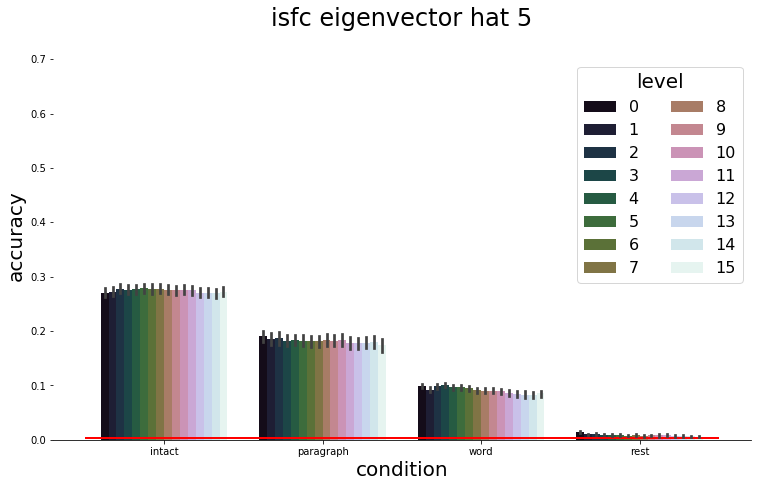

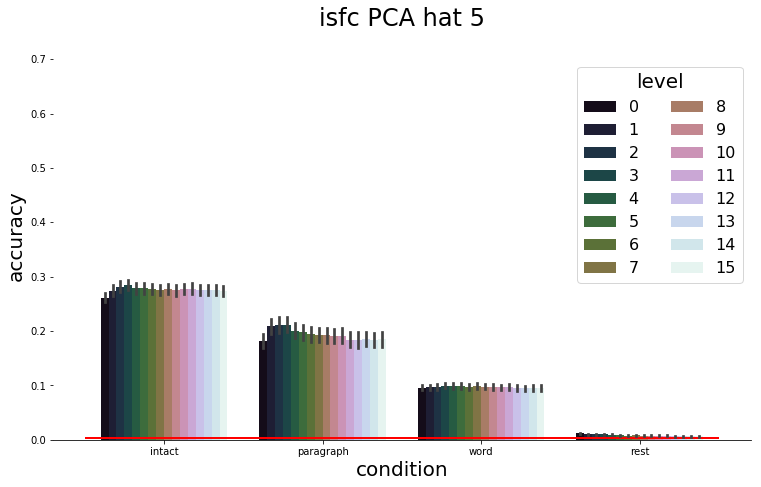

In [13]:
## for 100
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])
        data['level'] = 20 - data.isnull().sum(axis=1)
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)



    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.pdf')
    grouped_barplot(full_data[full_data['level']<=15], 'condition', 'accuracy', 'level', ymin=0, ymax=.75, title=title, outfile=outfile)
    plt.close()

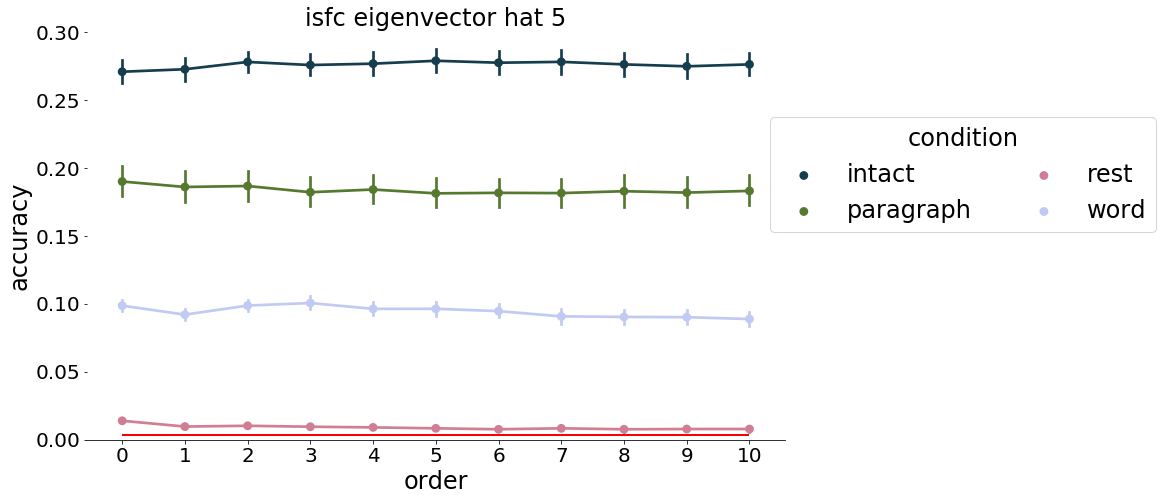

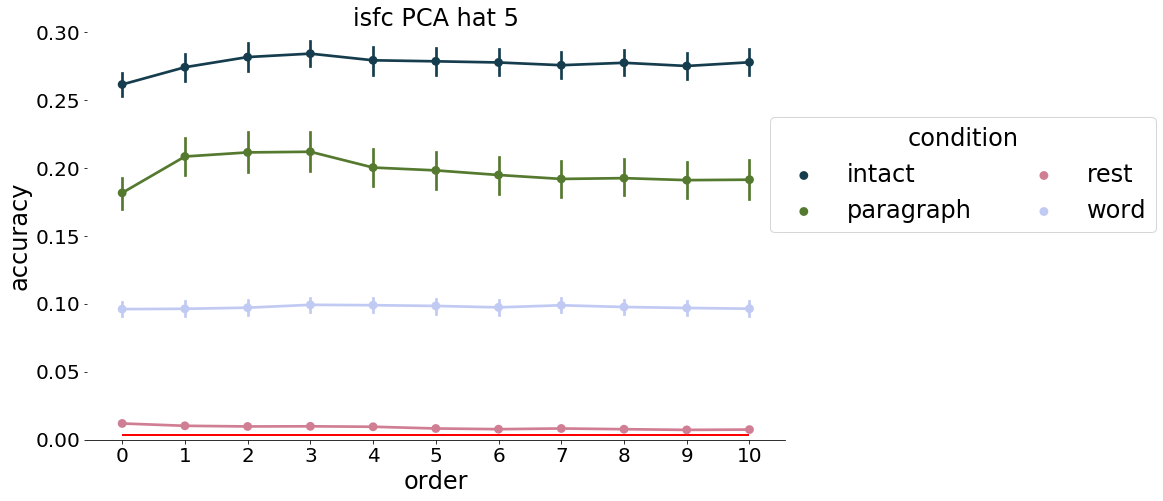

In [22]:
### for 100
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])
        data['level'] = 20 - data.isnull().sum(axis=1)
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)



    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_line_'+ analysis_name + '.pdf')
    grouped_pointplot(full_data[full_data['level']<=10], 'level', 'accuracy','condition', ymin=0, ymax=.3, title=title, outfile=outfile)
    plt.show()
    plt.close()

In [31]:
# ## rest
# for p in params:
#     param_name = os.path.basename(os.path.splitext(p)[0])

#     c = glob.glob(os.path.join(p, 'rest*'))[0]

#     full_data = pd.DataFrame()
#     data = pd.read_csv(c)
#     data['condition'] = os.path.basename(os.path.splitext(c)[0])
#     data['level'] = 20 - data.isnull().sum(axis=1)
#     if full_data.empty:
#         full_data = data
#     else:
#         full_data = full_data.append(data)



#     p_split = param_name.split('_')

#     title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

#     #outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.pdf')
#     chance_barplot(full_data, 'condition', 'accuracy', 'level', ymin=0, ymax=.02, title=title, outfile=outfile)
#     plt.close()

## For peak accuracy by level

In [32]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    levs = []
    cs = []
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])
        data['level'] = 20 - data.isnull().sum(axis=1)
        df = data.groupby(['level'], as_index=False)['accuracy'].mean()
        levs.append(df[df['accuracy'] == df.max()['accuracy']]['level'].values[0])
        cs.append(os.path.basename(os.path.splitext(c)[0]))

    full_data = pd.DataFrame({'level':levs, 'condition':cs})
    sns.barplot(x='condition', y='level', color='k', data=full_data).set_title(param_name)
    plt.show()

## Optimize weights time-chunked

In [33]:
analysis_name = 'level_analysis_chunked'

In [34]:
data_dir = os.path.join(all_data_dir, analysis_name)

In [35]:
params = glob.glob(os.path.join(data_dir, '*'))

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


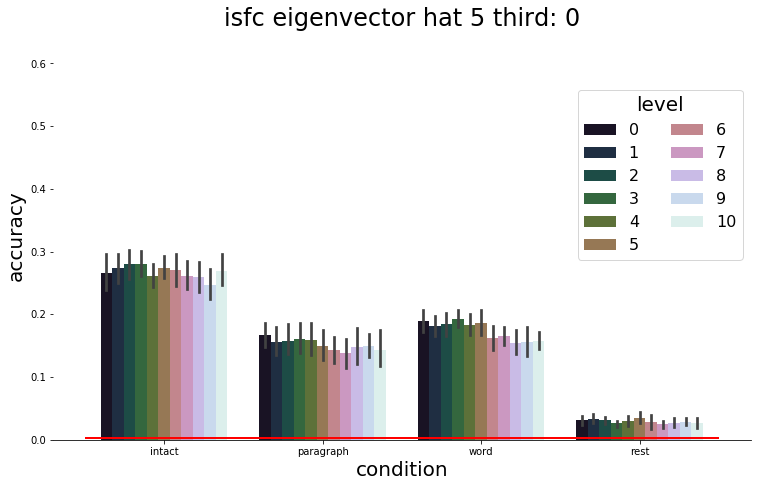

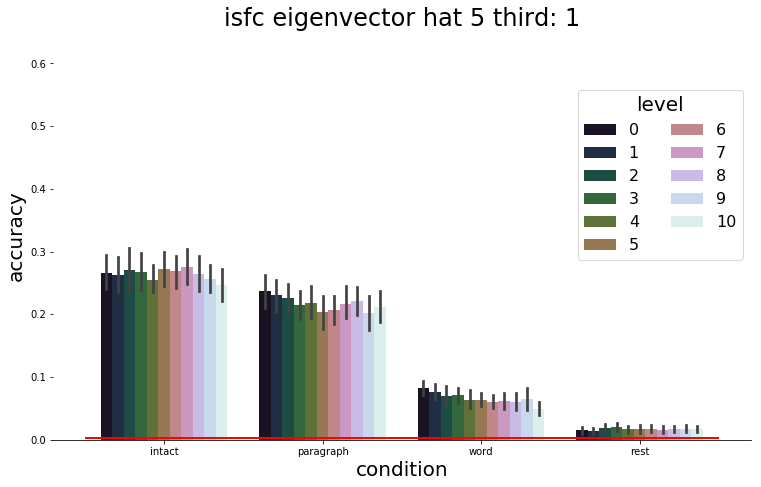

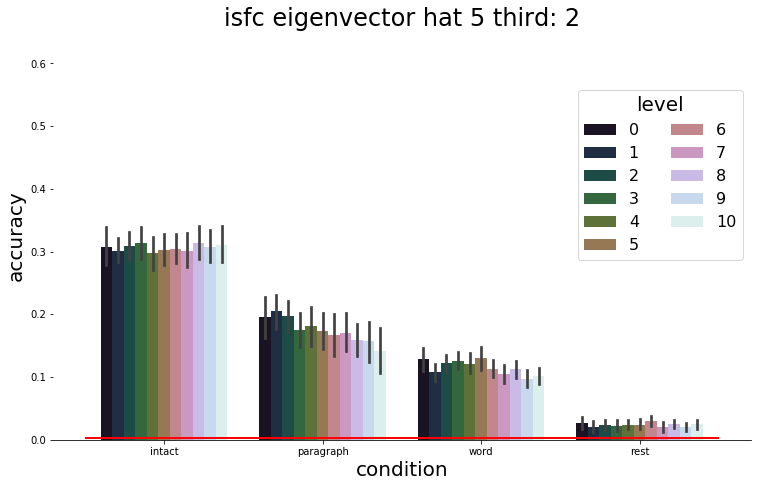

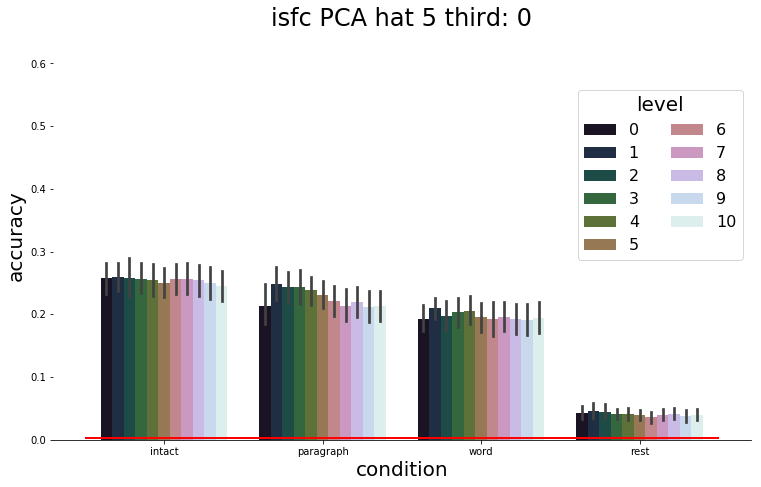

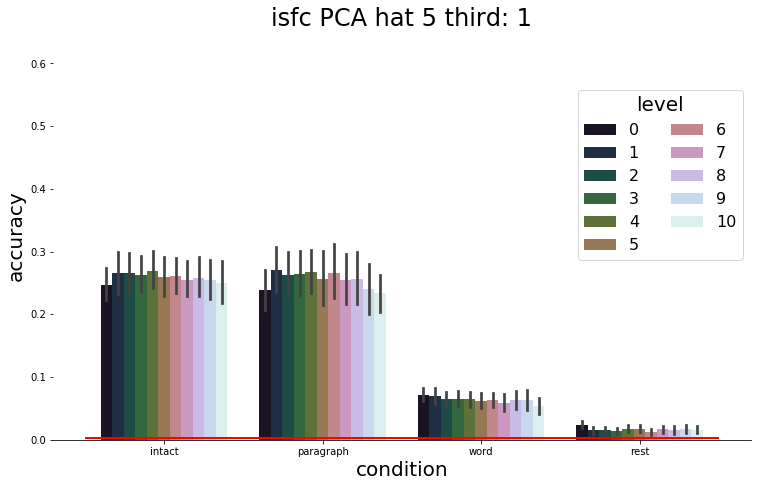

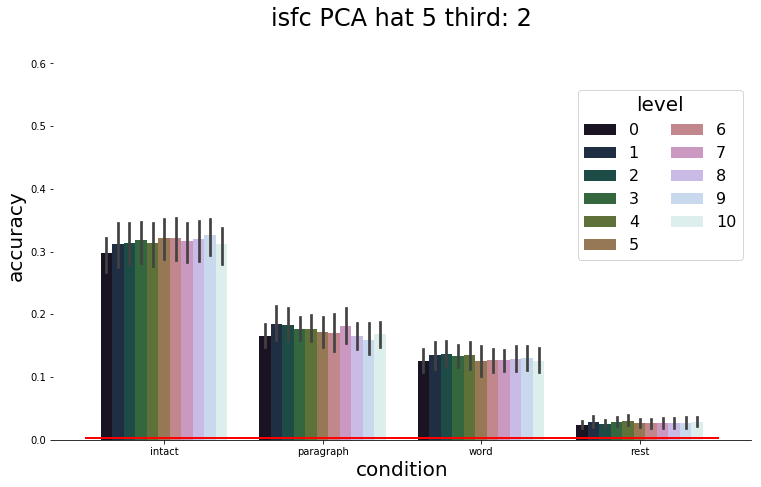

In [36]:
## for 100
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])
        data['level'] = 20 - data.isnull().sum(axis=1)
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

    for t in range(3):
        
        full_data_third = full_data[full_data['third'] == t]

        p_split = param_name.split('_')

        title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] + ' third: ' + str(t)


        outfile = os.path.join(figdir, param_name + '_'+ str(t) + '_accuracy.pdf')
        grouped_barplot(full_data_third[full_data_third['level']<=10], 'condition', 'accuracy', 'level', ymin=0, ymax=.65, title=title, outfile=outfile)
        plt.close()
        
        

In [37]:
# for p in params:
#     param_name = os.path.basename(os.path.splitext(p)[0])

#     conds =glob.glob(os.path.join(p, '*.csv'))

#     full_data = pd.DataFrame()
#     for c in conds:
#         data = pd.read_csv(c)
#         data['condition'] = os.path.basename(os.path.splitext(c)[0])
#         if full_data.empty:
#             full_data = data
#         else:
#             full_data = full_data.append(data)

#     for t in range(3):
        
#         full_data_third = full_data[full_data['third'] == t]

#         p_split = param_name.split('_')

#         title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] + ' third: ' + str(t)


#         outfile = os.path.join(figdir, param_name + '_'+ str(t) + '_accuracy.pdf')
#         grouped_barplot(full_data_third[full_data_third['level']<=10], 'condition', 'accuracy', 'level', ymin=0, ymax=.35, title=title, outfile=outfile)
#         plt.close()
        
        

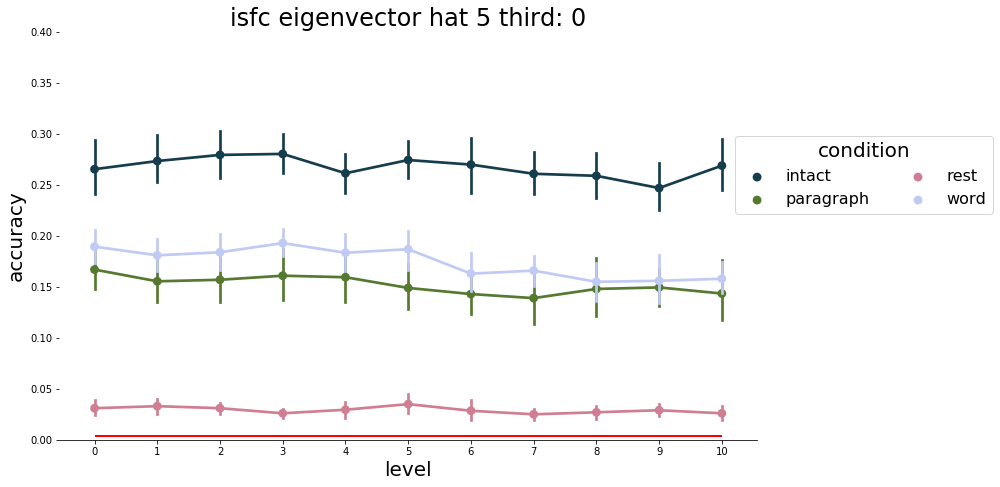

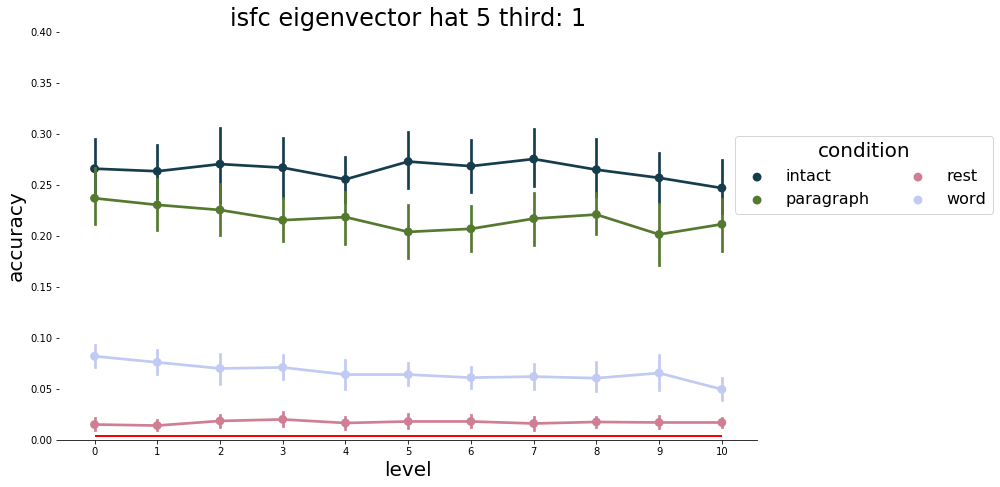

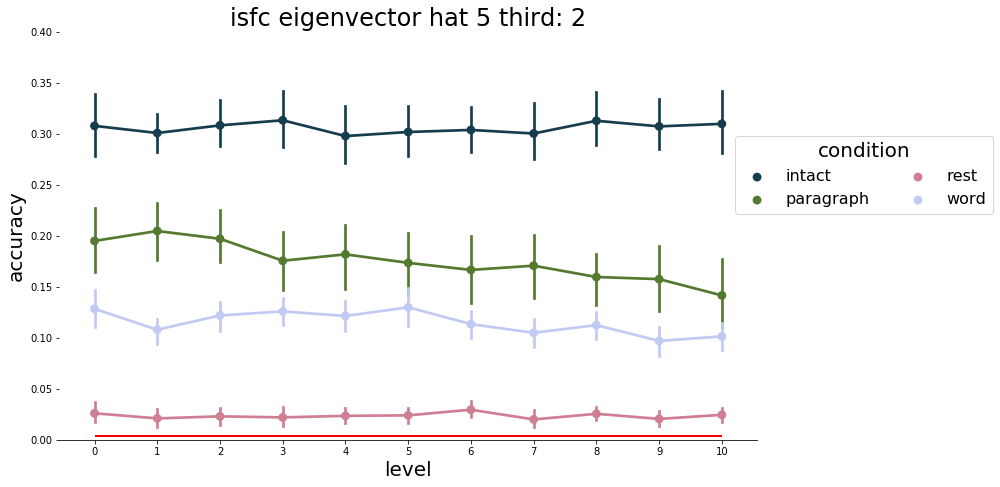

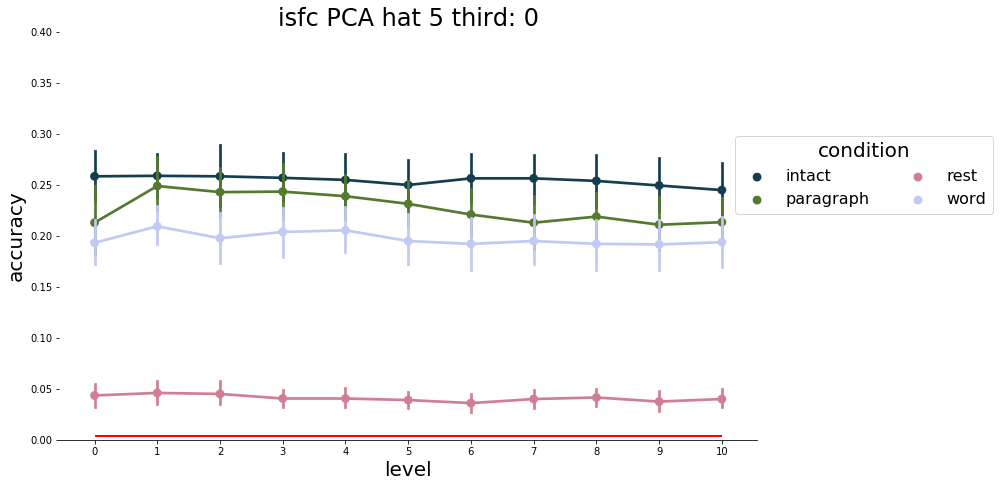

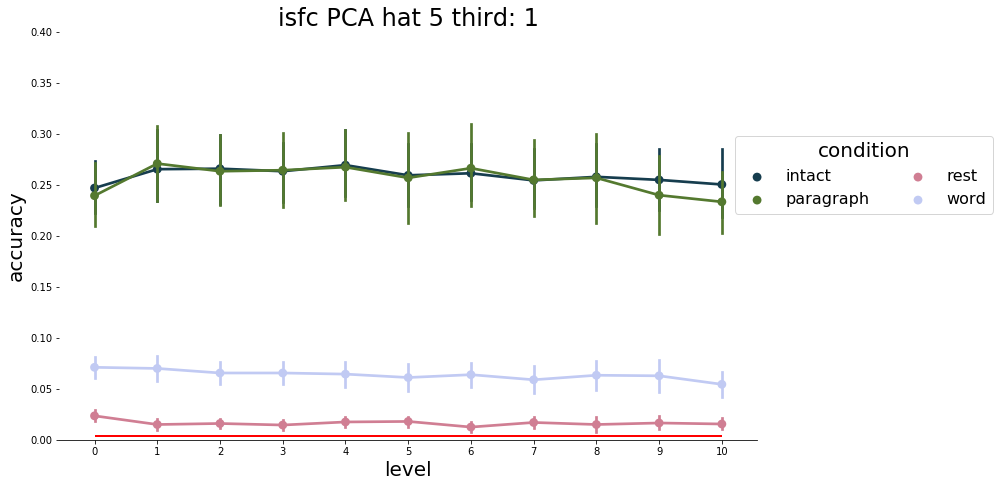

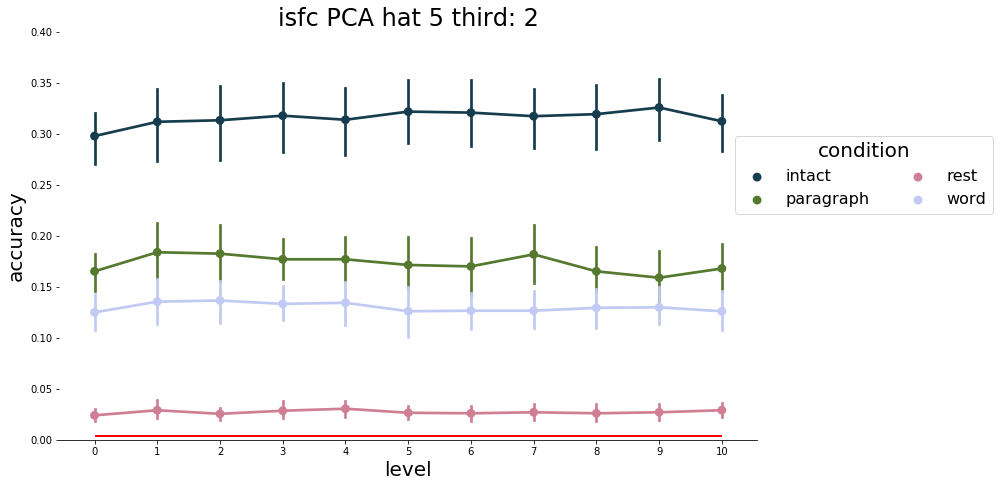

In [38]:
## for 100
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])
        data['level'] = 20 - data.isnull().sum(axis=1)
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

    for t in range(3):
        
        full_data_third = full_data[full_data['third'] == t]

        p_split = param_name.split('_')

        title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] + ' third: ' + str(t)


        outfile = os.path.join(figdir, param_name + '_line_'+ str(t) + '_accuracy.pdf')
        grouped_pointplot(full_data_third[full_data_third['level']<=10], 'level', 'accuracy','condition', ymin=0, ymax=.4, title=title, outfile=outfile)
        plt.show()
        plt.close()
        

In [39]:
# for p in params:
#     param_name = os.path.basename(os.path.splitext(p)[0])

#     conds =glob.glob(os.path.join(p, '*.csv'))

#     full_data = pd.DataFrame()
#     for c in conds:
#         data = pd.read_csv(c)
#         data['condition'] = os.path.basename(os.path.splitext(c)[0])
#         if full_data.empty:
#             full_data = data
#         else:
#             full_data = full_data.append(data)

#     for t in range(3):
        
#         full_data_third = full_data[full_data['third'] == t]

#         p_split = param_name.split('_')

#         title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] + ' third: ' + str(t)


#         outfile = os.path.join(figdir, param_name + '_line_'+ str(t) + '_accuracy.pdf')
#         grouped_pointplot(full_data_third[full_data_third['level']<=10], 'level', 'accuracy','condition', ymin=0, ymax=.25, title=title, outfile=outfile)
#         plt.show()
#         plt.close()
        

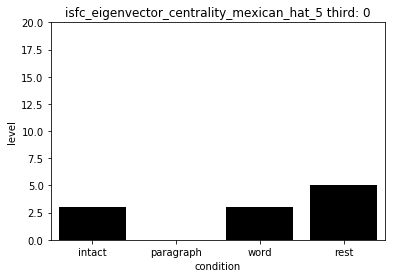

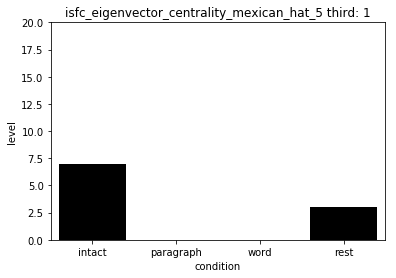

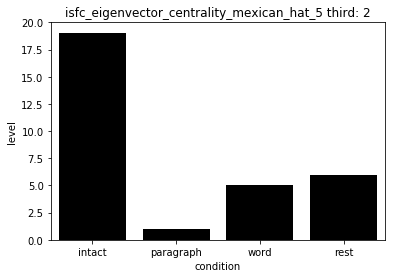

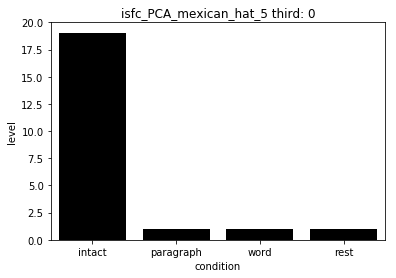

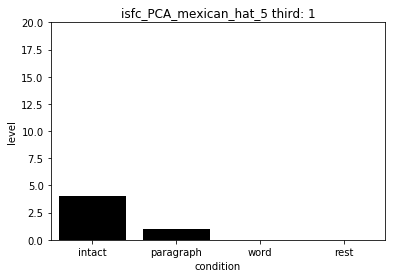

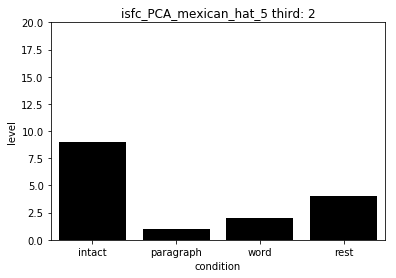

In [40]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    levs = []
    cs = ['intact', 'paragraph', 'word', 'rest']
    
    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])
        data['level'] = 20 - data.isnull().sum(axis=1)
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)
        
    cs = ['intact', 'paragraph', 'word', 'rest']
            
    for t in range(3):
        data_third = full_data[full_data['third'] == t]

        levs = []

        df = data_third.groupby(['level', 'condition'], as_index=False)['accuracy'].mean()
        for c in cs:
            cond_df = df[df['condition'] == c]
            levs.append(cond_df[cond_df['accuracy'] == cond_df.max()['accuracy']]['level'].values[0])

        tmp_df = pd.DataFrame({'level':levs, 'condition':cs})
        g = sns.barplot(x='condition', y='level', color='k', data=tmp_df).set_title(param_name + ' third: ' + str(t))
        plt.ylim(0, 20)
        plt.show()

/Users/lucyowen/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


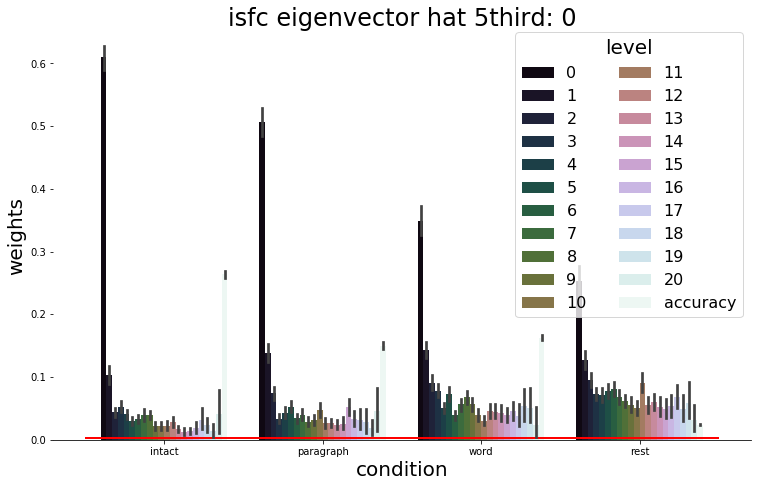

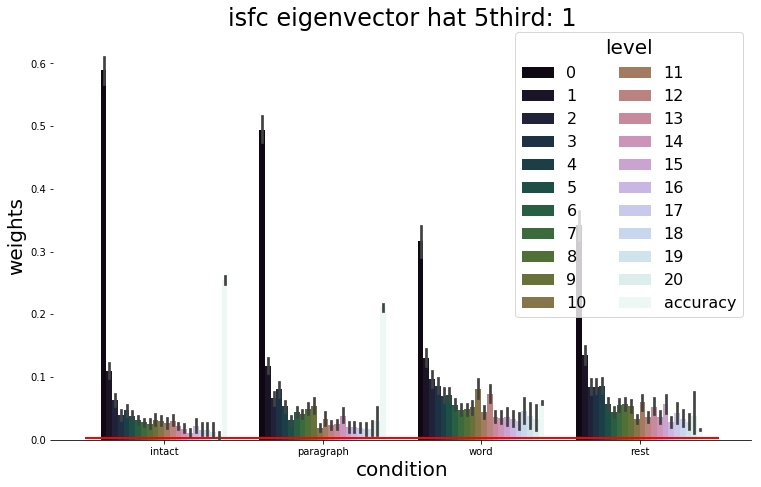

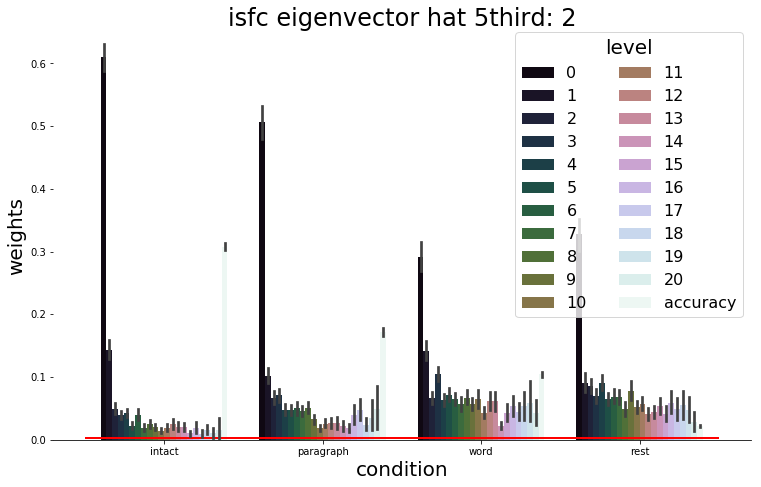

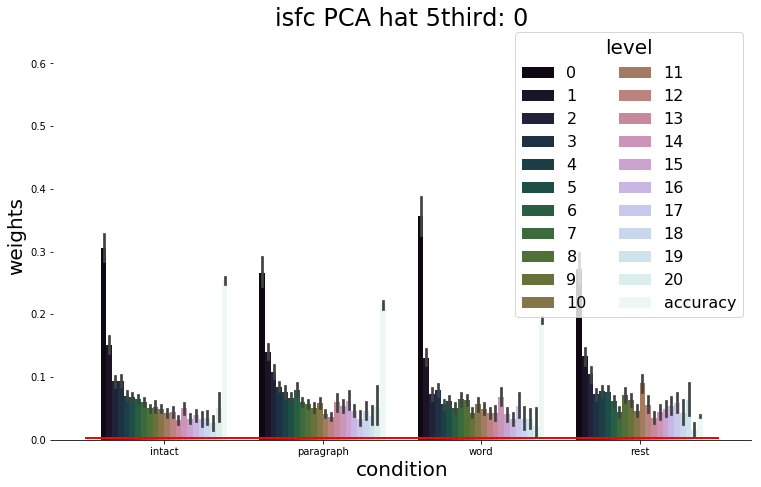

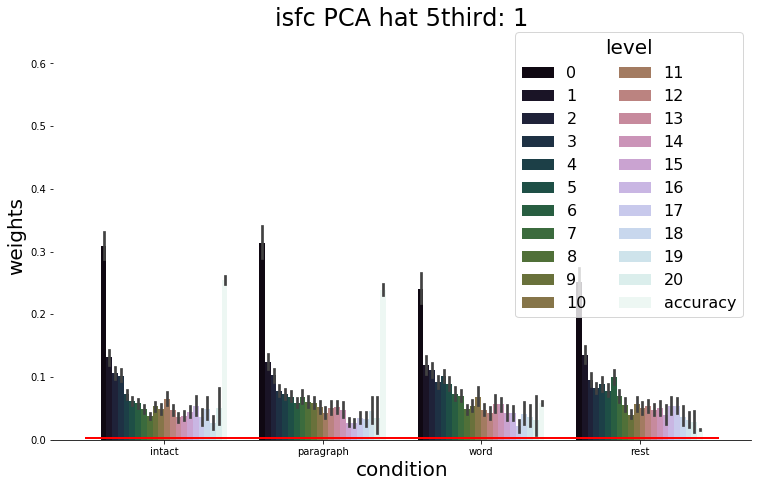

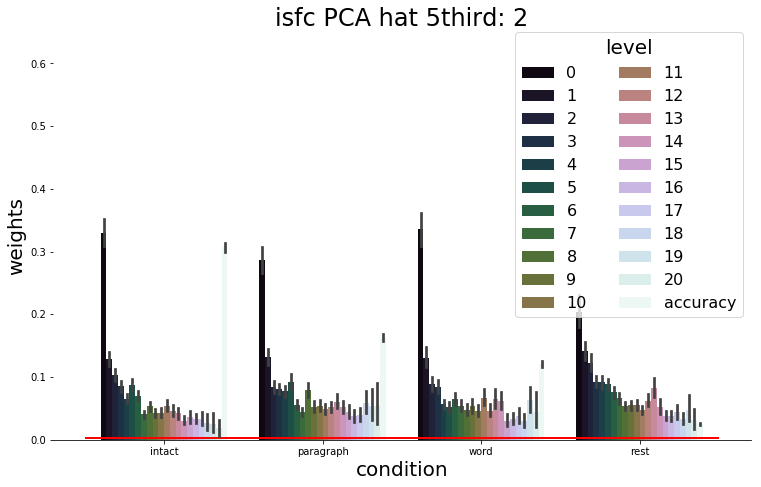

In [41]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

    for t in range(3):
        melted_df = pd.DataFrame()
        full_data_third = full_data[full_data['third'] == t]

        for c in np.arange(full_data_third['level'].max() + 2):
            if c!=full_data_third['level'].max() + 1:
                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data_third['level_' + str(c)]
                melted_temp_df['level'] = full_data_third['level']
                melted_temp_df['level'] = c
                melted_temp_df['condition'] = full_data_third['condition']

                if melted_df.empty:
                    melted_df = melted_temp_df
                else:
                    melted_df = melted_df.append(melted_temp_df)
            else:

                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data_third['accuracy']
                melted_temp_df['level'] = full_data_third['level']
                melted_temp_df['level'] = 'accuracy'
                melted_temp_df['condition'] = full_data_third['condition']
                melted_df = melted_df.append(melted_temp_df)
                full_data_third['error'] = 1-full_data_third['error']

        p_split = param_name.split('_')

        title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] + 'third: ' + str(t)


        outfile = os.path.join(figdir, param_name + '_'+ str(t) + '_accuracy.pdf')
        grouped_barplot(melted_df, 'condition', 'weights', 'level', ymin=0, ymax=.65, title=title, outfile=outfile)
        plt.close()

## Mixing analysis

In [42]:
analysis_name = 'level_analysis_mixing'

In [43]:
data_dir = os.path.join(all_data_dir, analysis_name)

In [44]:
params = glob.glob(os.path.join(data_dir, '*'))

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


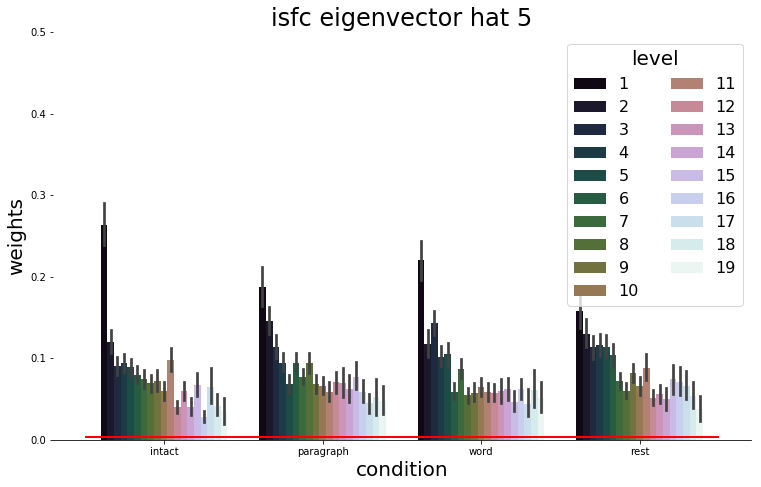

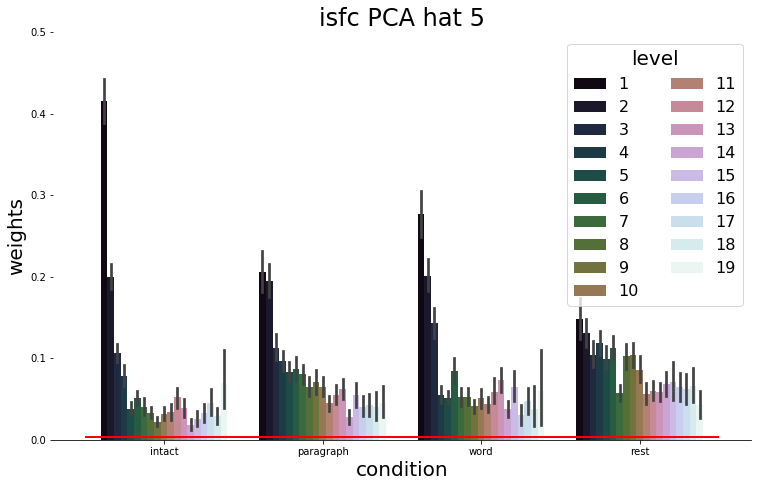

In [45]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

        melted_df = pd.DataFrame()
        for c in np.arange(1, full_data['level'].max()):
            if c!=full_data['level'].max() + 1:
                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['level_' + str(c)]
                melted_temp_df['level'] = full_data['level']
                melted_temp_df['level'] = c
                melted_temp_df['condition'] = full_data['condition']

                if melted_df.empty:
                    melted_df = melted_temp_df
                else:
                    melted_df = melted_df.append(melted_temp_df)
            else:

                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['accuracy']
                melted_temp_df['level'] = full_data['level']
                melted_temp_df['level'] = 'accuracy'
                melted_temp_df['condition'] = full_data['condition']
                melted_df = melted_df.append(melted_temp_df)
                full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.pdf')
    grouped_barplot(melted_df, 'condition', 'weights', 'level', ymin=0, ymax=.5, title=title, outfile=outfile)
    plt.close()

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


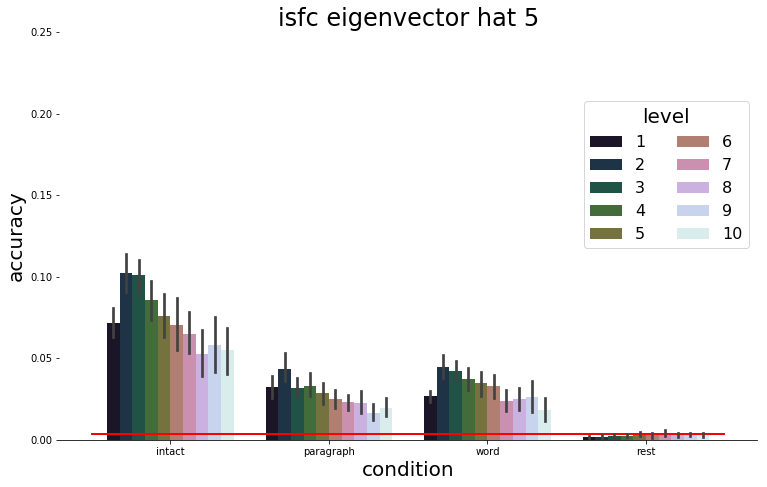

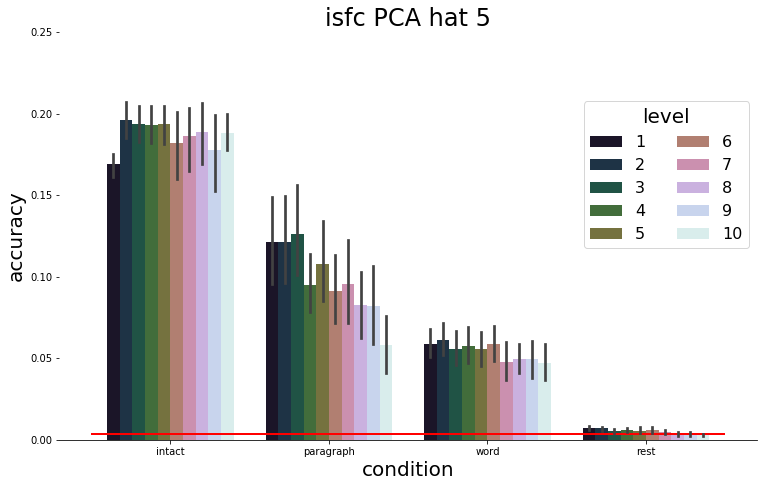

In [46]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)



    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.png')
    grouped_barplot(full_data[full_data['level']<=10], 'condition', 'accuracy', 'level', ymin=0, ymax=.25, title=title, outfile=outfile)
    plt.close()

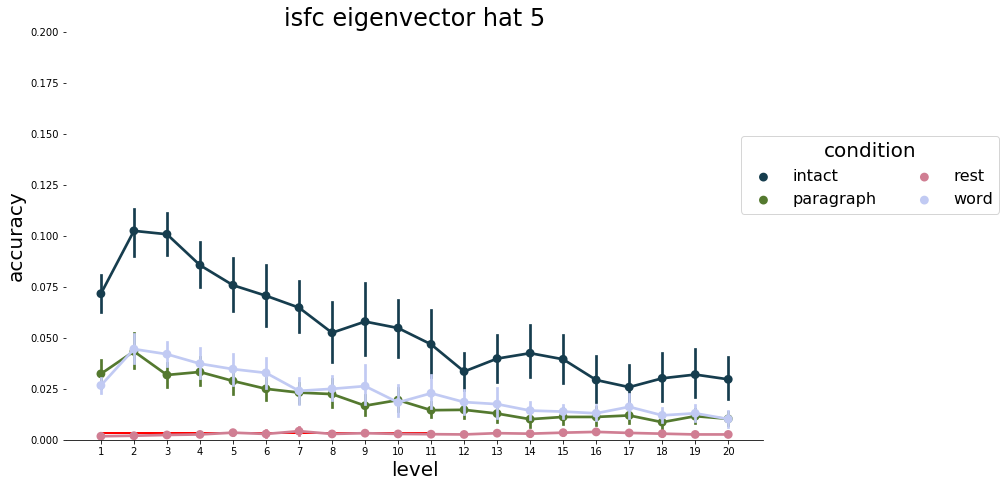

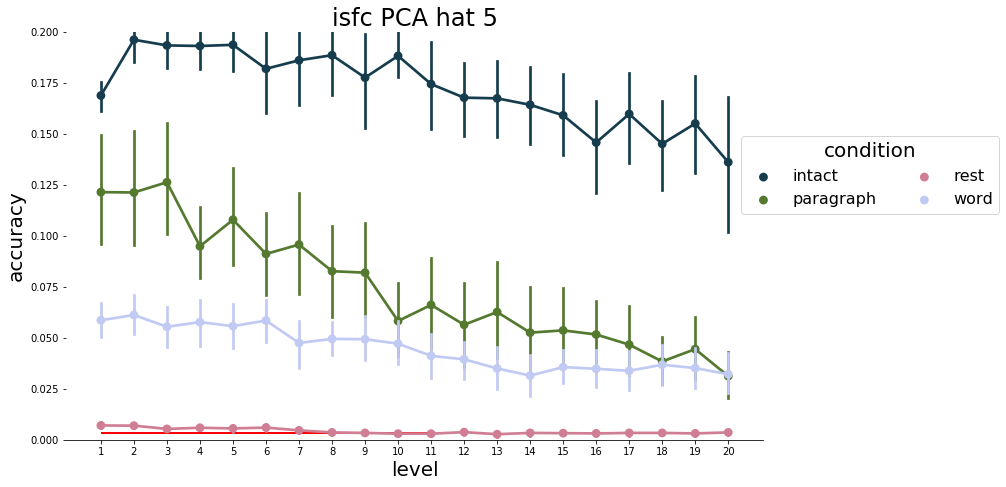

In [47]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])
        #data['level'] = 20 - data.isnull().sum(axis=1)
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)



    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_line_'+ analysis_name + '.pdf')
    grouped_pointplot(full_data, 'level', 'accuracy','condition', ymin=0, ymax=.2, title=title, outfile=outfile)
    plt.show()
    plt.close()

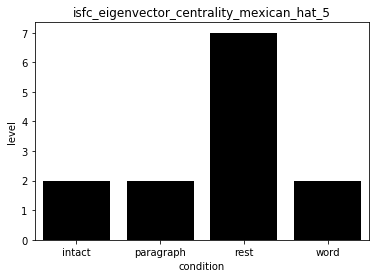

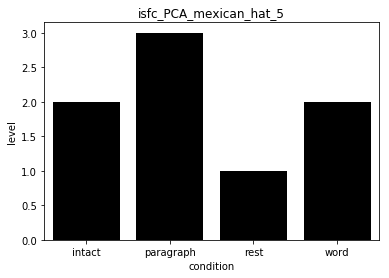

In [48]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    levs = []
    cs = []
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])
        data['level'] = 20 - data.isnull().sum(axis=1)
        df = data.groupby(['level'], as_index=False)['accuracy'].mean()
        levs.append(df[df['accuracy'] == df.max()['accuracy']]['level'].values[0])
        cs.append(os.path.basename(os.path.splitext(c)[0]))

    full_data = pd.DataFrame({'level':levs, 'condition':cs})
    sns.barplot(x='condition', y='level', color='k', data=full_data).set_title(param_name)
    plt.show()

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


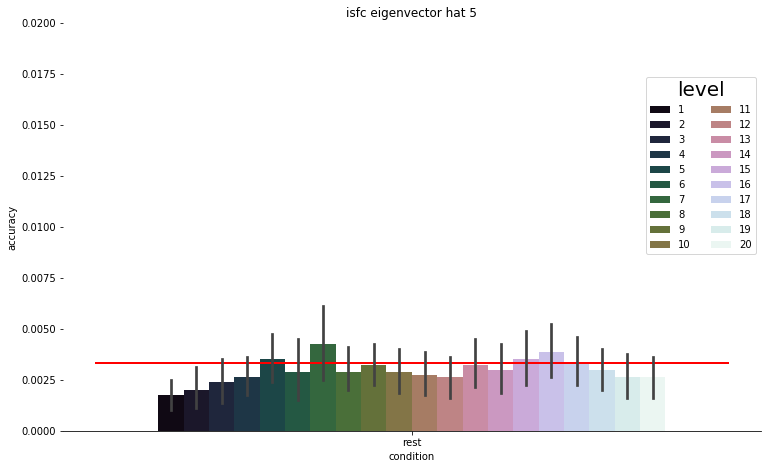

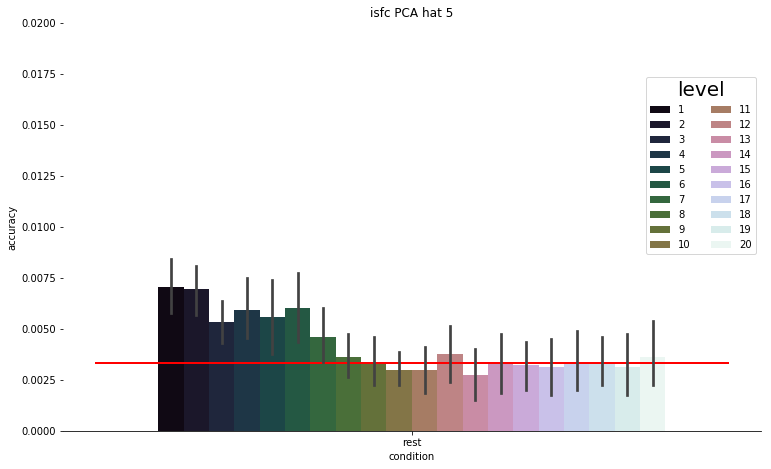

In [49]:
## rest
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    c = glob.glob(os.path.join(p, 'rest*'))[0]

    full_data = pd.DataFrame()
    data = pd.read_csv(c)
    data['condition'] = os.path.basename(os.path.splitext(c)[0])
    if full_data.empty:
        full_data = data
    else:
        full_data = full_data.append(data)



    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    #outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.pdf')
    chance_barplot(full_data, 'condition', 'accuracy', 'level', ymin=0, ymax=.02, title=title, outfile=outfile)
    plt.close()